In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import torch as th
# 创建DGL异构图
g = dgl.heterograph({
    ('drug', 'interacts', 'drug'): (th.tensor([0, 1]), th.tensor([1, 2])),
    ('drug', 'interacts', 'gene'): (th.tensor([0, 1]), th.tensor([2, 3])),
    ('drug', 'treats', 'disease'): (th.tensor([1]), th.tensor([2]))
})

g.device



device(type='cpu')

In [2]:
cuda_g = g.to('cuda:0')
cuda_g.device

device(type='cuda', index=0)

In [6]:
g.canonical_etypes

[('drug', 'interacts', 'drug'),
 ('drug', 'interacts', 'gene'),
 ('drug', 'treats', 'disease')]

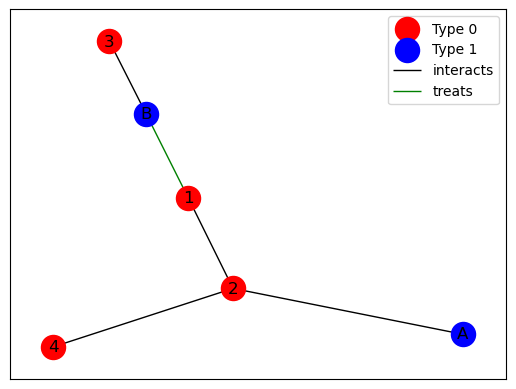

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a heterogeneous graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4], bipartite=0)
G.add_nodes_from(['A', 'B'], bipartite=1)
G.add_edges_from([(1, 2), (2, 'A'), (3, 'B'), (4, 2)], type='interacts')
G.add_edge(1, 'B', type='treats')

# Define different styles for different types of nodes and edges
node_colors = {0: 'red', 1: 'blue'}
edge_colors = {'interacts': 'black', 'treats': 'green'}

# Get the positions using a layout algorithm
pos = nx.spring_layout(G)

# Draw nodes
for node_type, color in node_colors.items():
    nodes_of_type = [n for n, d in G.nodes(data=True) if d.get('bipartite') == node_type]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_type, node_color=color, label=f'Type {node_type}')

# Draw edges
for edge_type, color in edge_colors.items():
    edges_of_type = [(u, v) for u, v, d in G.edges(data=True) if d.get('type') == edge_type]
    nx.draw_networkx_edges(G, pos, edgelist=edges_of_type, edge_color=color, label=edge_type)

# Draw labels
nx.draw_networkx_labels(G, pos)

# Set legend
plt.legend(scatterpoints=1)
plt.show()


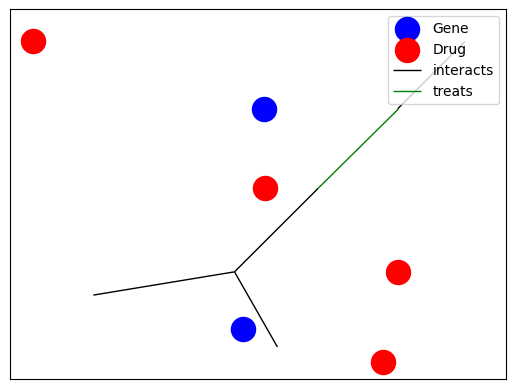

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import torch as th
# 创建一个异构图
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4], type='Drug')
G.add_nodes_from(['A', 'B'], type='Gene')
G.add_edges_from([(1, 2), (2, 'A'), (3, 'B'), (4, 2)], type='interacts')
G.add_edge(1, 'B', type='treats')

# 定义不同类型的节点和边的样式
node_colors = {'Drug': 'red', 'Gene': 'blue'}
edge_colors = {'interacts': 'black', 'treats': 'green'}

# 绘制节点
for ntype in set(nx.get_node_attributes(G, 'type').values()):
    nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), 
                           nodelist=[n for n,attrdict in G.nodes.data() if attrdict['type'] == ntype], 
                           node_color=node_colors[ntype], 
                           label=ntype)

# 绘制边
for etype in set(nx.get_edge_attributes(G, 'type').values()):
    nx.draw_networkx_edges(G, pos=nx.spring_layout(G), 
                           edgelist=[(u, v) for u, v, attrdict in G.edges.data() if attrdict['type'] == etype], 
                           edge_color=edge_colors[etype], 
                           label=etype)

# 设置图例
plt.legend(scatterpoints=1)
plt.show()


In [2]:
import torch 
import numpy as np
import torch
 
L = torch.tensor([[x0,y0,z0],[x1,y1,z1],[x2,y2,z2]])
p = torch.tensor([[px_0,py_0,pz_0],[px_1,py_1,pz_1],[px_2,py_2,pz_2]])
print(L.shape)

NameError: name 'x0' is not defined

In [3]:
import torch

# 假设我们有一个 (3, 3) 的张量
L = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 添加一个新的维度来获得 (3, 3, 1) 的形状
L_unsqueezed = L.unsqueeze(2)

print(L_unsqueezed)  # 输出将会是torch.Size([3, 3, 1])
print(L)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [29]:
x = torch.rand(4,4)
x.view(2,2,2,2)
print(x)

tensor([[0.2965, 0.6504, 0.1853, 0.1171],
        [0.0393, 0.8828, 0.7097, 0.9605],
        [0.6685, 0.0137, 0.8686, 0.0347],
        [0.7591, 0.9489, 0.1084, 0.5508]])


In [44]:
x = torch.rand(,4)
x.data[1,0,2,3]

tensor(0.6032)

tensor([[0.2965, 0.6504],
        [0.1853, 0.1171],
        [0.0393, 0.8828],
        [0.7097, 0.9605],
        [0.6685, 0.0137],
        [0.8686, 0.0347],
        [0.7591, 0.9489],
        [0.1084, 0.5508]])

torch.Size([4, 4])

In [4]:
import networkx as nx
import dgl
import torch as th

# 创建DGL同构图
g = dgl.graph(([0, 1, 2, 3], [1, 2, 3, 0]))

# 将DGL图转换为NetworkX图
nx_g = g.to_networkx()

# 绘制NetworkX图
nx.draw(nx_g, with_labels=True)
dgl.show(nx_g)


: 